In [1]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from scipy import signal
from math import atan, pi
import pandas as pd
import numpy as np

In [2]:
import os
current_path = os.getcwd()
current_path

'C:\\Users\\Owner\\Documents\\DiffractionStudies\\metalens\\analysis'

In [5]:
(1 - np.sqrt(3)/2)/2.

0.0669872981077807

In [5]:
d_sipm_lens = 130 # distance between sipm and lens (mm)

def GetData(file_name):
    # Get the data

    data = {}
    with open('../data/'+file_name) as file:
        reader = csv.reader(file)
        i = 0
        for row in reader:
            if i==2:
                data['position_lens'] = float(row[0])

            if i==6:
                data['position_led'] = float(row[0])
                
            if i==10:
                #row_str = row[0][1:-1].split(',')
                #data['positions_sipm'] = np.array([float(i) for i in row_str])
                data['positions_sipm'] = np.array([float(row[j]) for j in range(len(row))])

            if i==14:
                data['maxes'] = np.array([float(row[j]) for j in range(len(row))])
                
            if i==18:
                data['rot_angle'] = float(row[0])
            i+= 1
            
    return data

def GetAngle(data, prominence=0.0005, distance=10, peak_num=0):
    
    # Find the peaks and their widths with a large prominence
    peaks, _ = signal.find_peaks(data['maxes'], prominence=0.0005, distance=10)
    
    center = data['pos_lens'][np.argmax(data['maxes'])]
    
    # Calculate the angle or refraction
    thetas = [atan((center-pos)/d_sipm_lens) for pos in data['pos_lens']]

    return [t*360/(2*pi) for t in thetas]

In [6]:
end_filename = "_metalens_100ns_15sweeps.csv"
dataset_range1 = range(44,54)
#dataset_range2 = range(24,44)
data = []
for i in dataset_range1:
    filename = "run"+str(i)+end_filename
    data.append(GetData(filename))

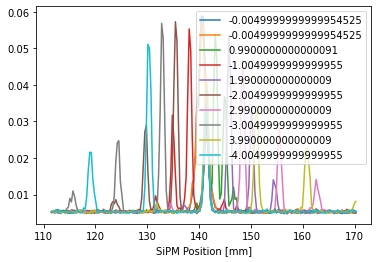

In [7]:
lens_center = 176.575
for run in data:
    plt.plot(run['positions_sipm'], run['maxes'], label=str(run['position_lens']-lens_center))
plt.xlabel('SiPM Position [mm]')
plt.legend()
plt.show()

In [11]:
center_lens = data[0]['position_lens']
center_sipm = data[0]['positions_sipm'][np.argmax(data[0]['maxes'])]

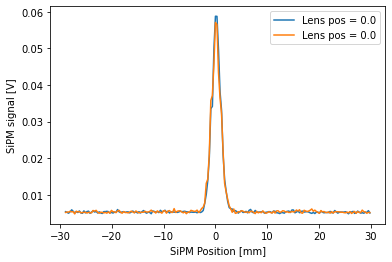

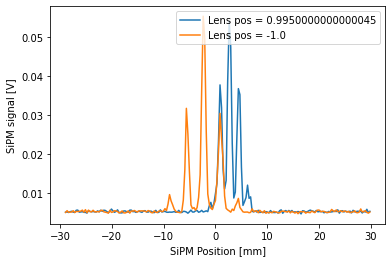

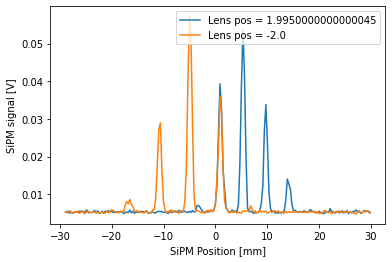

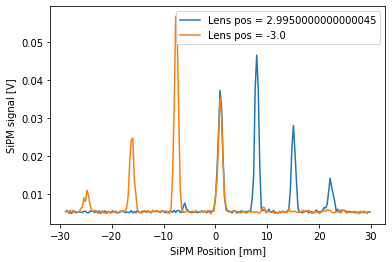

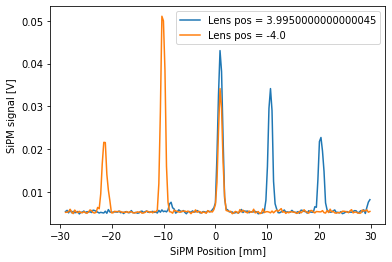

In [13]:
i = 0
for _ in range(len(data)//2):
    
    plt.plot(data[i]['positions_sipm']-center_sipm, data[i]['maxes'], label='Lens pos = '+str(data[i]['position_lens']-center_lens))
    plt.plot(data[i+1]['positions_sipm']-center_sipm, data[i+1]['maxes'], label='Lens pos = '+str(data[i+1]['position_lens']-center_lens))
    plt.xlabel('SiPM Position [mm]')
    plt.ylabel('SiPM signal [V]')
    plt.legend()
    plt.show()
    
    i += 2

In [18]:
x1=np.array([315.345, 315.59000000000003, 315.835, 316.08, 316.325, 316.57, 316.815, 317.06, 317.305, 317.55, 317.795, 318.04, 318.285, 318.53000000000003, 318.77500000000003, 319.02, 319.265, 319.51, 319.755, 320.0, 320.245, 320.49, 320.735, 320.98, 321.225, 321.47, 321.71500000000003, 321.96, 322.205, 322.45, 322.695, 322.94, 323.185, 323.43, 323.675, 323.92, 324.165, 324.41, 324.65500000000003, 324.90000000000003, 325.145, 325.39, 325.635, 325.88, 326.125, 326.37, 326.615, 326.86, 327.105, 327.35, 327.595, 327.84000000000003, 328.085, 328.33, 328.575, 328.82, 329.065, 329.31, 329.555, 329.8, 330.045, 330.29, 330.535, 330.78000000000003, 331.02500000000003, 331.27, 331.515, 331.76, 332.005, 332.25, 332.495, 332.74, 332.985, 333.23, 333.475, 333.72, 333.96500000000003, 334.21, 334.455, 334.7, 334.945, 335.19, 335.435, 335.68, 335.925, 336.17, 336.415, 336.66, 336.90500000000003, 337.15000000000003, 337.395, 337.64, 337.885, 338.13, 338.375, 338.62, 338.865, 339.11, 339.355, 339.6, 339.845, 340.09000000000003, 340.335, 340.58, 340.825, 341.07, 341.315, 341.56, 341.805, 342.05, 342.295, 342.54, 342.785, 343.03000000000003, 343.27500000000003, 343.52, 343.765, 344.01, 344.255, 344.5, 344.745, 344.99, 345.235, 345.48, 345.725, 345.97, 346.21500000000003, 346.46, 346.705, 346.95, 347.195, 347.44, 347.685, 347.93, 348.175, 348.42, 348.665, 348.91, 349.15500000000003, 349.40000000000003, 349.645, 349.89, 350.135, 350.38, 350.625, 350.87, 351.115, 351.36, 351.605, 351.85, 352.095, 352.34000000000003, 352.585, 352.83, 353.075, 353.32, 353.565, 353.81, 354.055, 354.3, 354.545, 354.79, 355.035, 355.28000000000003, 355.52500000000003, 355.77, 356.015, 356.26, 356.505, 356.75, 356.995, 357.24, 357.485, 357.73, 357.975, 358.22, 358.46500000000003, 358.71, 358.955, 359.2, 359.445, 359.69, 359.935, 360.18, 360.425, 360.67, 360.915, 361.16, 361.40500000000003, 361.65000000000003, 361.895, 362.14, 362.385, 362.63, 362.875, 363.12, 363.365, 363.61, 363.855, 364.1, 364.345, 364.59000000000003, 364.835, 365.08, 365.325, 365.57, 365.815, 366.06, 366.305, 366.55, 366.795, 367.04, 367.285, 367.53000000000003, 367.77500000000003, 368.02, 368.265, 368.51, 368.755, 369.0, 369.245, 369.49, 369.735, 369.98, 370.225, 370.47, 370.71500000000003, 370.96, 371.205, 371.45, 371.695, 371.94, 372.185, 372.43, 372.675, 372.92, 373.165, 373.41, 373.65500000000003, 373.90000000000003])
v1=np.array([0.00596704137569759, 0.00562588367029093, 0.0054649602243444, 0.00538771697029006, 0.00554220347839873, 0.00525897821353283, 0.00529116290272214, 0.00525254127569497, 0.00557438816758804, 0.00538771697029006, 0.00537484309461433, 0.00539415390812792, 0.00515598720812704, 0.00520104577299207, 0.00540059084596578, 0.00535553228110075, 0.00539415390812792, 0.0053812800324522, 0.00511092864326201, 0.00534265840542503, 0.00527828902704641, 0.00539415390812792, 0.00537484309461433, 0.00514311333245132, 0.00519460883515421, 0.00517529802164063, 0.0053812800324522, 0.00507230701623484, 0.00551001878920943, 0.00534909534326289, 0.00560657285677735, 0.00516886108380277, 0.00505943314055912, 0.00530403677839786, 0.00522679352434352, 0.00560013591893949, 0.00514955027028918, 0.00514955027028918, 0.00575462242704816, 0.00631463601894211, 0.00737673076218925, 0.00764708215137944, 0.00702269918110687, 0.00644337477569934, 0.00548427103785798, 0.00535553228110075, 0.00516886108380277, 0.0054649602243444, 0.00533622146758717, 0.0051302394567756, 0.00515598720812704, 0.00548427103785798, 0.00529116290272214, 0.00534909534326289, 0.00545852328650653, 0.00551645572704729, 0.00527828902704641, 0.0052139196486678, 0.00590267199731898, 0.00540702778380364, 0.00515598720812704, 0.00533622146758717, 0.00509161782974843, 0.0054649602243444, 0.00523966740001924, 0.00528472596488427, 0.00554220347839873, 0.00522679352434352, 0.00528472596488427, 0.00544564941083081, 0.00543921247299295, 0.00551645572704729, 0.00527828902704641, 0.00514311333245132, 0.0054971449135337, 0.00569025304866955, 0.00531047371623572, 0.00523966740001924, 0.00507230701623484, 0.00525897821353283, 0.00732523525948636, 0.00863193364057224, 0.00785950110002887, 0.00760202358651441, 0.00688108654867392, 0.0065334919054294, 0.00543277553515509, 0.00539415390812792, 0.00548427103785798, 0.00520748271082994, 0.00547783410002012, 0.00507230701623484, 0.00543277553515509, 0.00511736558109988, 0.00522035658650566, 0.00533622146758717, 0.00539415390812792, 0.00520104577299207, 0.00537484309461433, 0.00567094223515596, 0.00552932960272301, 0.0052461043378571, 0.0054971449135337, 0.00531047371623572, 0.00567737917299382, 0.00545852328650653, 0.0052461043378571, 0.00550358185137156, 0.00529759984056, 0.00523966740001924, 0.00540702778380364, 0.00505299620272126, 0.00519460883515421, 0.00607646931894124, 0.00707419468380976, 0.00856756426219363, 0.00952023106219713, 0.0166909798135748, 0.02964853568119, 0.0684761447191704, 0.11588419189502, 0.142365754159982, 0.128558522497769, 0.0927627111814218, 0.0446723485947587, 0.0224005436757579, 0.0115349926054478, 0.00937218149192631, 0.00829077593516558, 0.00655923965678085, 0.00522679352434352, 0.0053297845297493, 0.00561300979461521, 0.00515598720812704, 0.00545208634866867, 0.00540702778380364, 0.00538771697029006, 0.00522035658650566, 0.00525897821353283, 0.00535553228110075, 0.00530403677839786, 0.00533622146758717, 0.0054134647216415, 0.00515598720812704, 0.00545208634866867, 0.00535553228110075, 0.00533622146758717, 0.00506587007839698, 0.00495000519731548, 0.00514311333245132, 0.00514955027028918, 0.00567094223515596, 0.00528472596488427, 0.00576105936488602, 0.00534909534326289, 0.00531691065407358, 0.00533622146758717, 0.00548427103785798, 0.0052139196486678, 0.00514311333245132, 0.00526541515137069, 0.00554864041623659, 0.0053812800324522, 0.00518817189731635, 0.00530403677839786, 0.00572243773785885, 0.00507874395407271, 0.00569025304866955, 0.00525897821353283, 0.0052139196486678, 0.00489850969461259, 0.00527828902704641, 0.00572243773785885, 0.00543921247299295, 0.00565163142164238, 0.00550358185137156, 0.00523966740001924, 0.00573531161353458, 0.00520104577299207, 0.00485345112974755, 0.0053297845297493, 0.00531691065407358, 0.00519460883515421, 0.00518817189731635, 0.0050465592648834, 0.00540702778380364, 0.00523323046218138, 0.00538771697029006, 0.00548427103785798, 0.00531691065407358, 0.00552932960272301, 0.00536840615677647, 0.00544564941083081, 0.00503368538920768, 0.00563875754596666, 0.00531047371623572, 0.00565806835948024, 0.00522035658650566, 0.00526541515137069, 0.00589623505948111, 0.00646268558921292, 0.00792387047840748, 0.0112260195892304, 0.0129060603649123, 0.0119147719378816, 0.00693258205137681, 0.00569668998650741, 0.00530403677839786, 0.00556151429191232, 0.00561300979461521, 0.00514955027028918, 0.00523323046218138, 0.00527185208920855, 0.00508518089191057, 0.00498862682434265, 0.00525897821353283, 0.00562588367029093, 0.00548427103785798, 0.00596704137569759, 0.00534265840542503, 0.00514311333245132, 0.00569668998650741, 0.00502081151353195, 0.00547139716218226, 0.0054134647216415, 0.00581899180542678, 0.00551001878920943, 0.00550358185137156, 0.00555507735407446, 0.00544564941083081, 0.00560013591893949, 0.00516242414596491, 0.00511092864326201, 0.00534265840542503, 0.00556795122975018, 0.00527828902704641, 0.0052461043378571, 0.00554864041623659, 0.00499506376218051, 0.00514311333245132])
data1 = {'pos_lens':x1, 'maxes':v1}
t1 = GetAngle(data1)

Text(0, 0.5, 'Signal (arb.)')

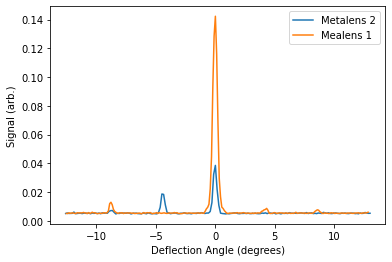

In [33]:
plt.plot(t2, data2['maxes'], label='Metalens 2')
plt.plot(t1, data1['maxes'], label='Mealens 1')
plt.legend()
plt.xlabel('Deflection Angle (degrees)')
plt.ylabel("Signal (arb.)")
#plt.yscale("log")

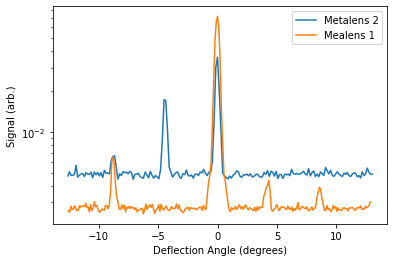

In [34]:
plt.plot(t2, data2['maxes']/sum(data2['maxes']), label='Metalens 2')
plt.plot(t1, data1['maxes']/sum(data1['maxes']), label='Mealens 1')
plt.legend()
plt.xlabel('Deflection Angle (degrees)')
plt.ylabel("Signal (arb.)")
plt.yscale("log")

In [30]:
sum(data1['maxes'])

1.9684413385693906